## Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [3]:
scaler = StandardScaler()
x_std = scaler.fit_transform(X)

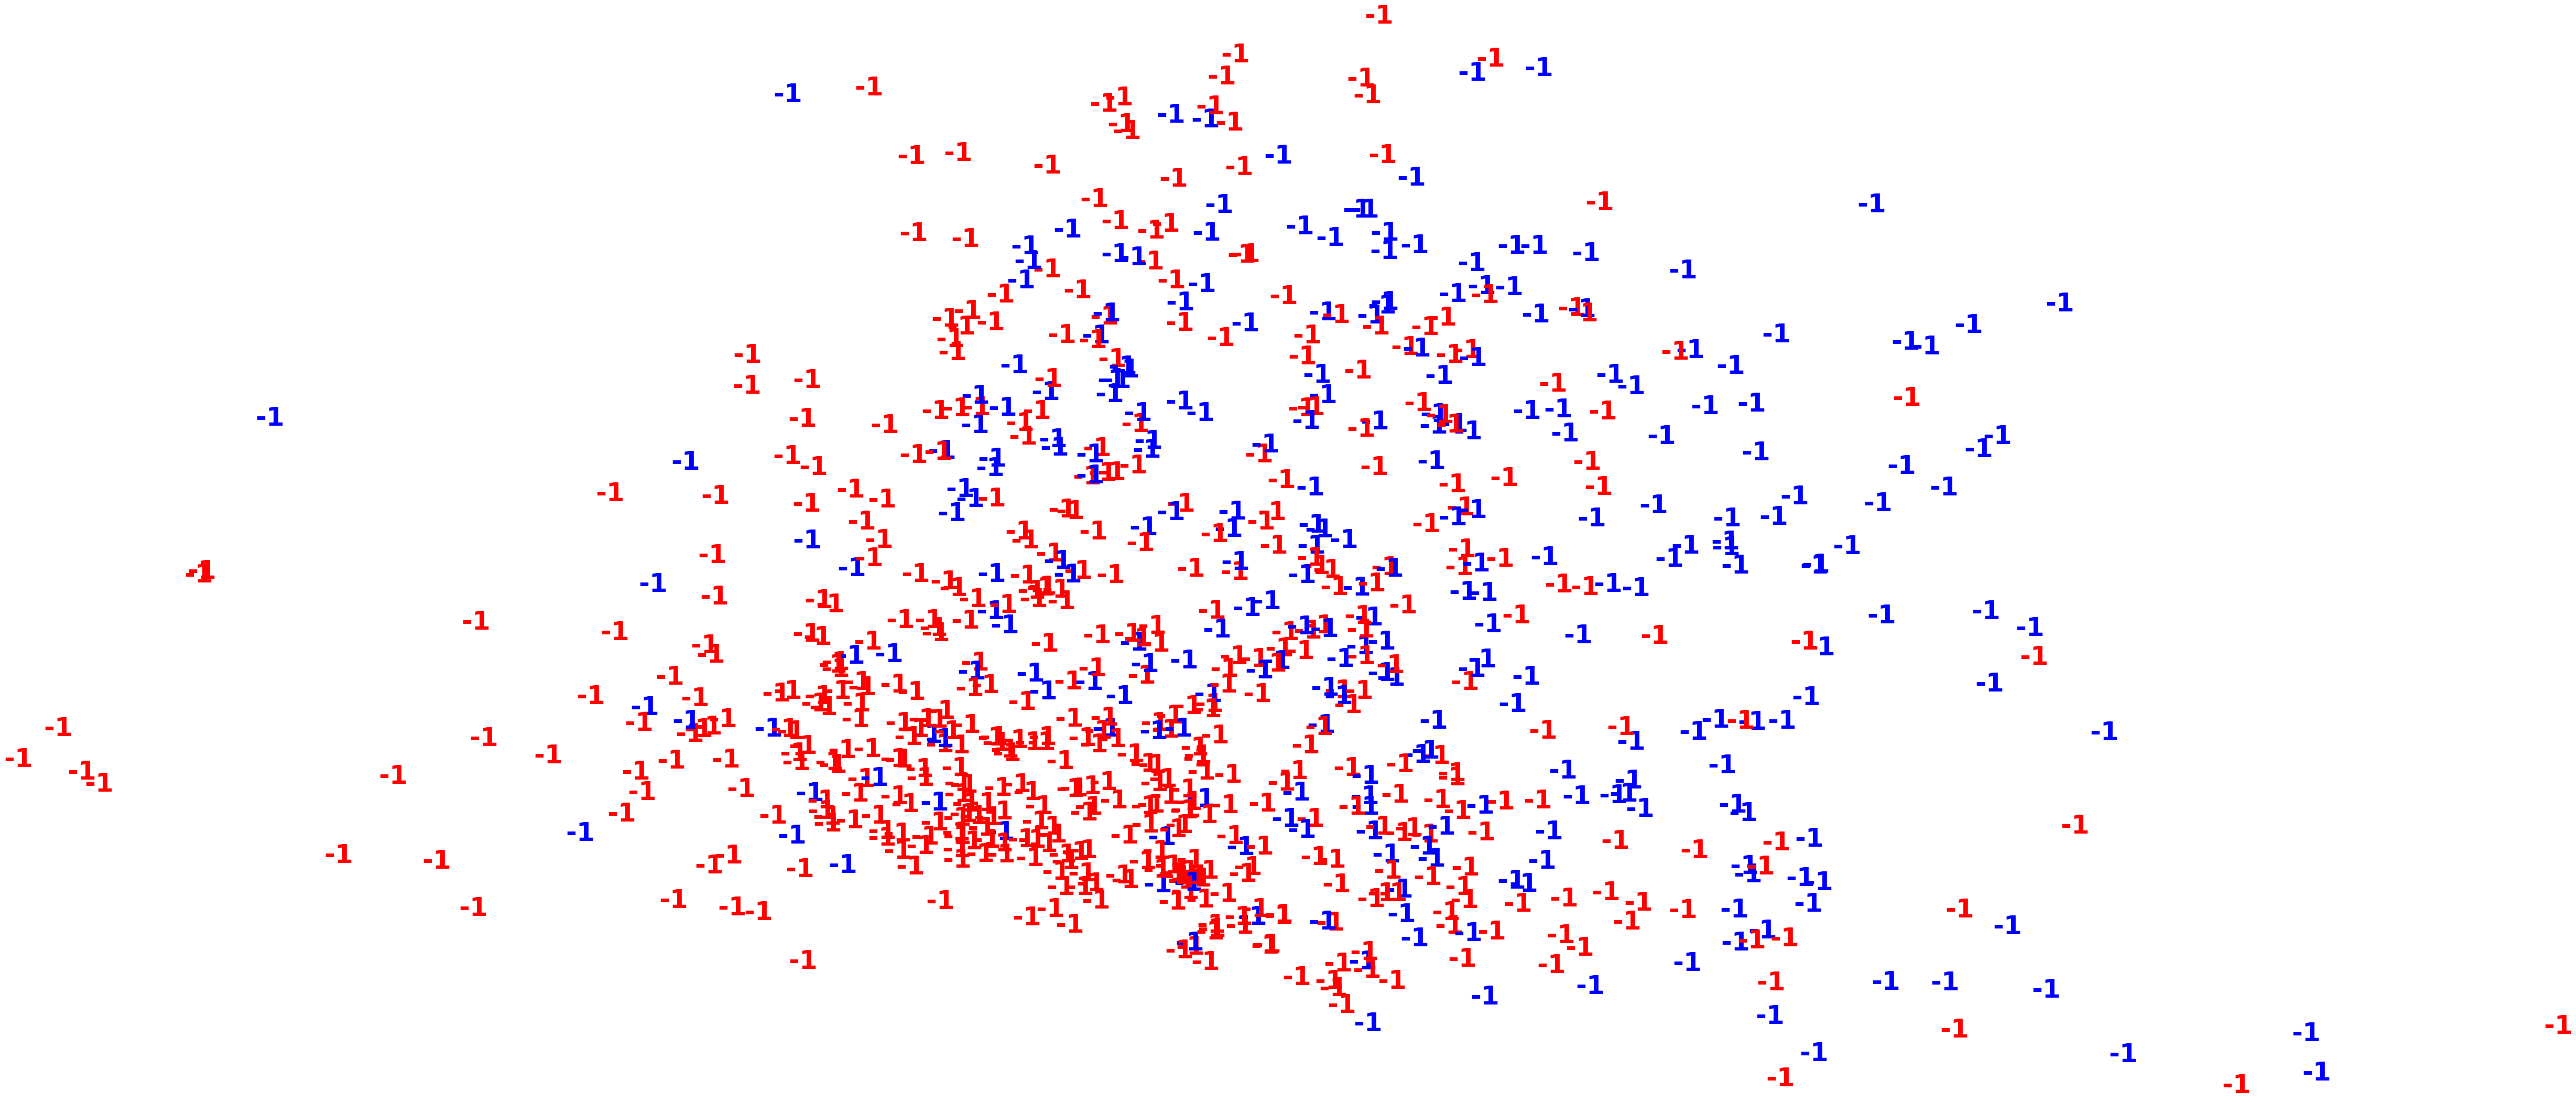

In [4]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan_cluster.fit_predict(x_std)

pca = PCA(n_components=2).fit_transform(x_std)

plt.figure(figsize=(8,6))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

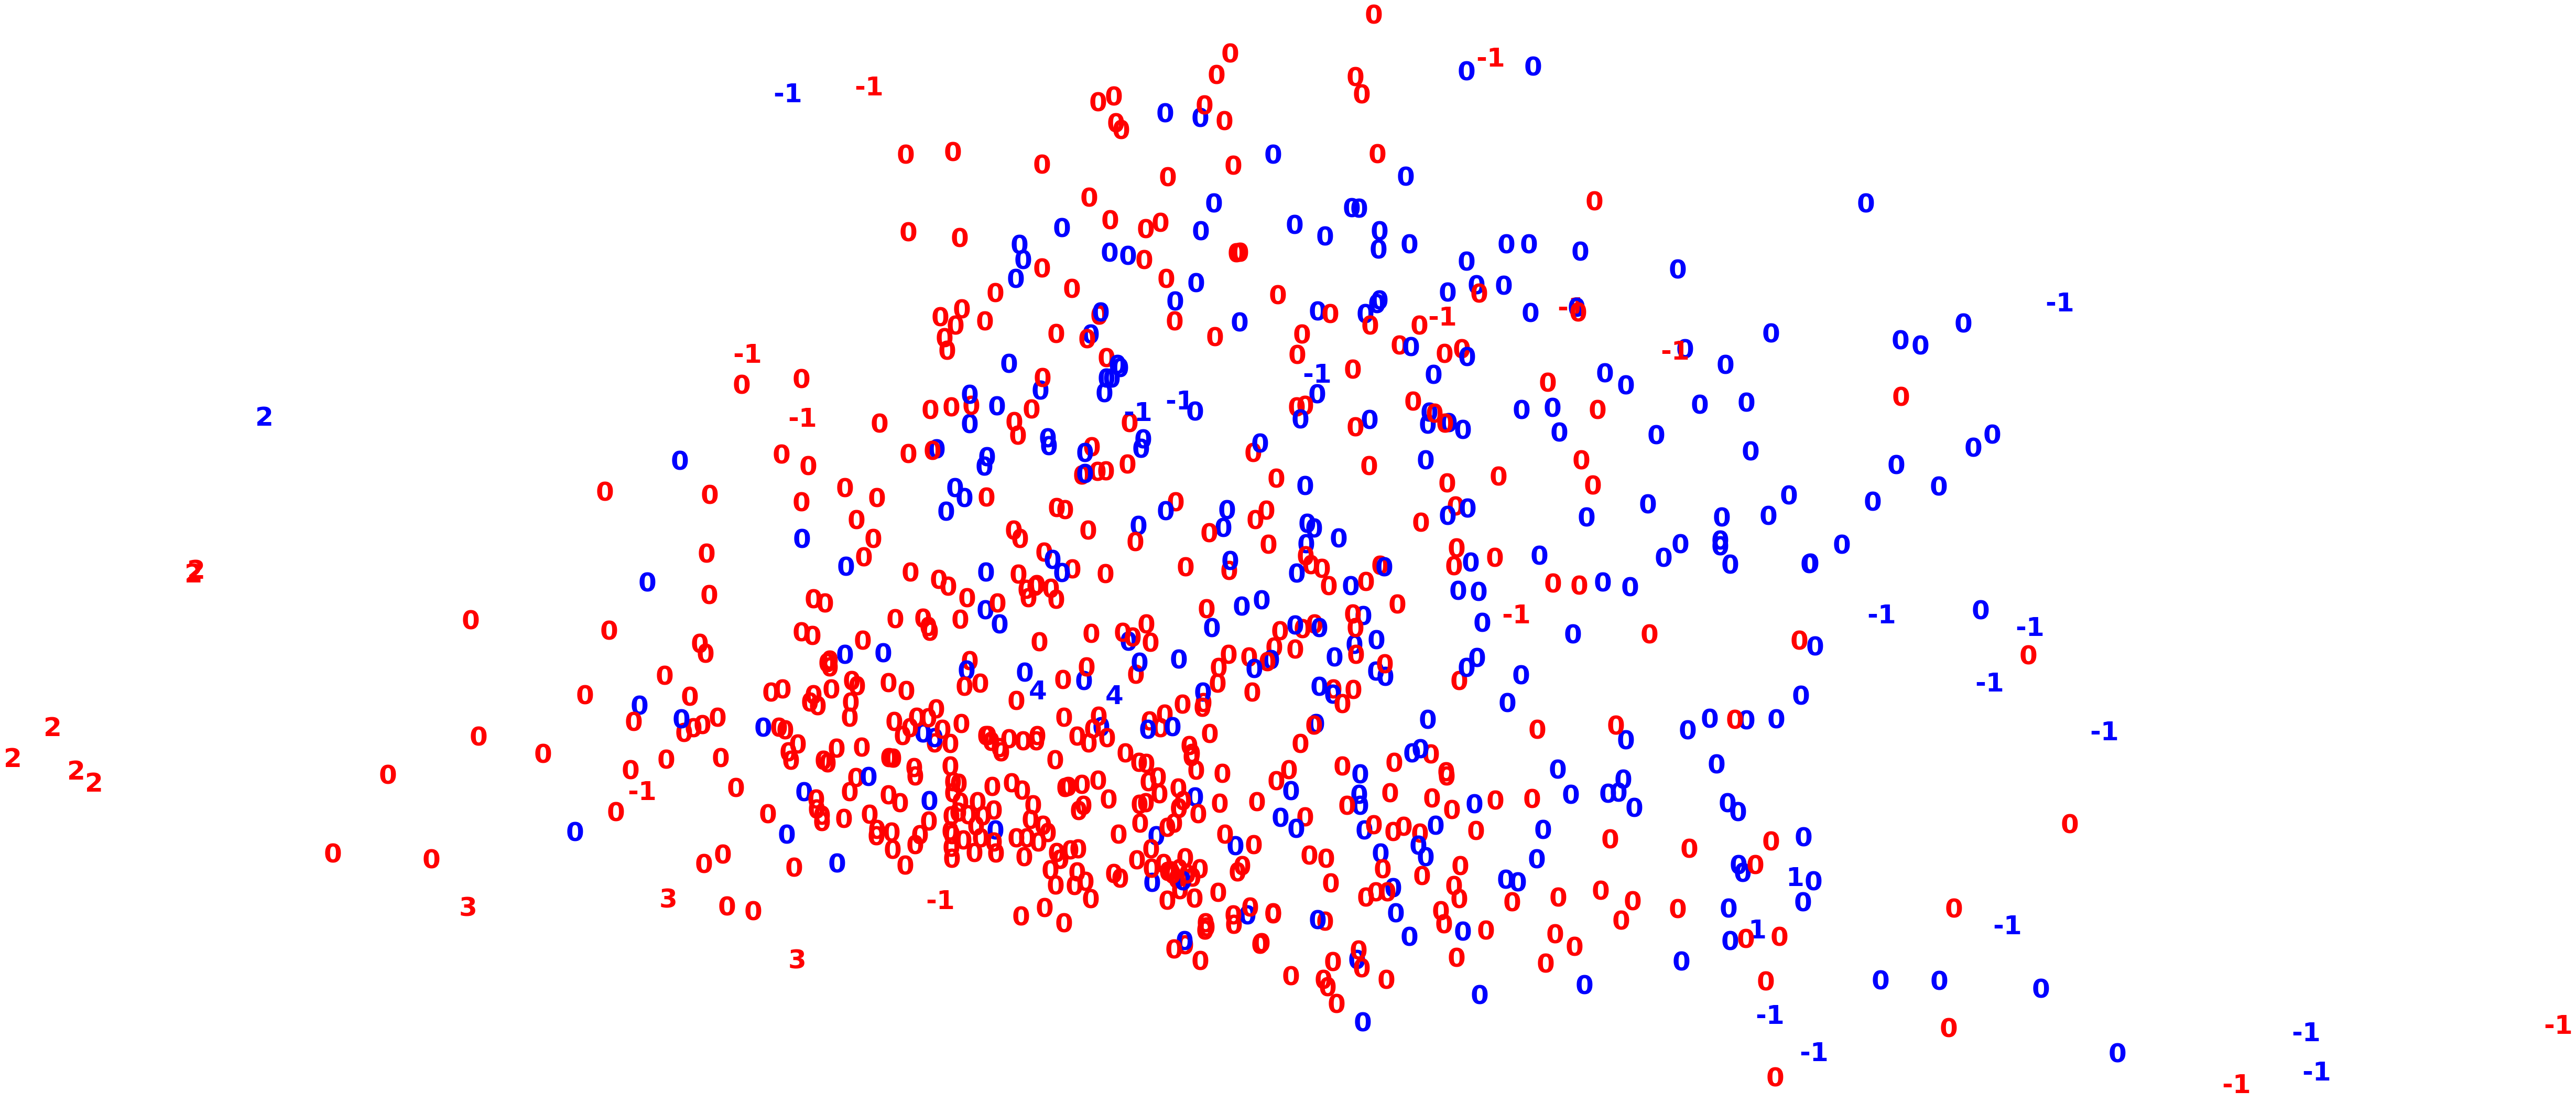

In [5]:
dbscan_cluster = DBSCAN(eps=2, min_samples=2)
clusters = dbscan_cluster.fit_predict(x_std)

pca = PCA(n_components=2).fit_transform(x_std)

plt.figure(figsize=(8,6))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

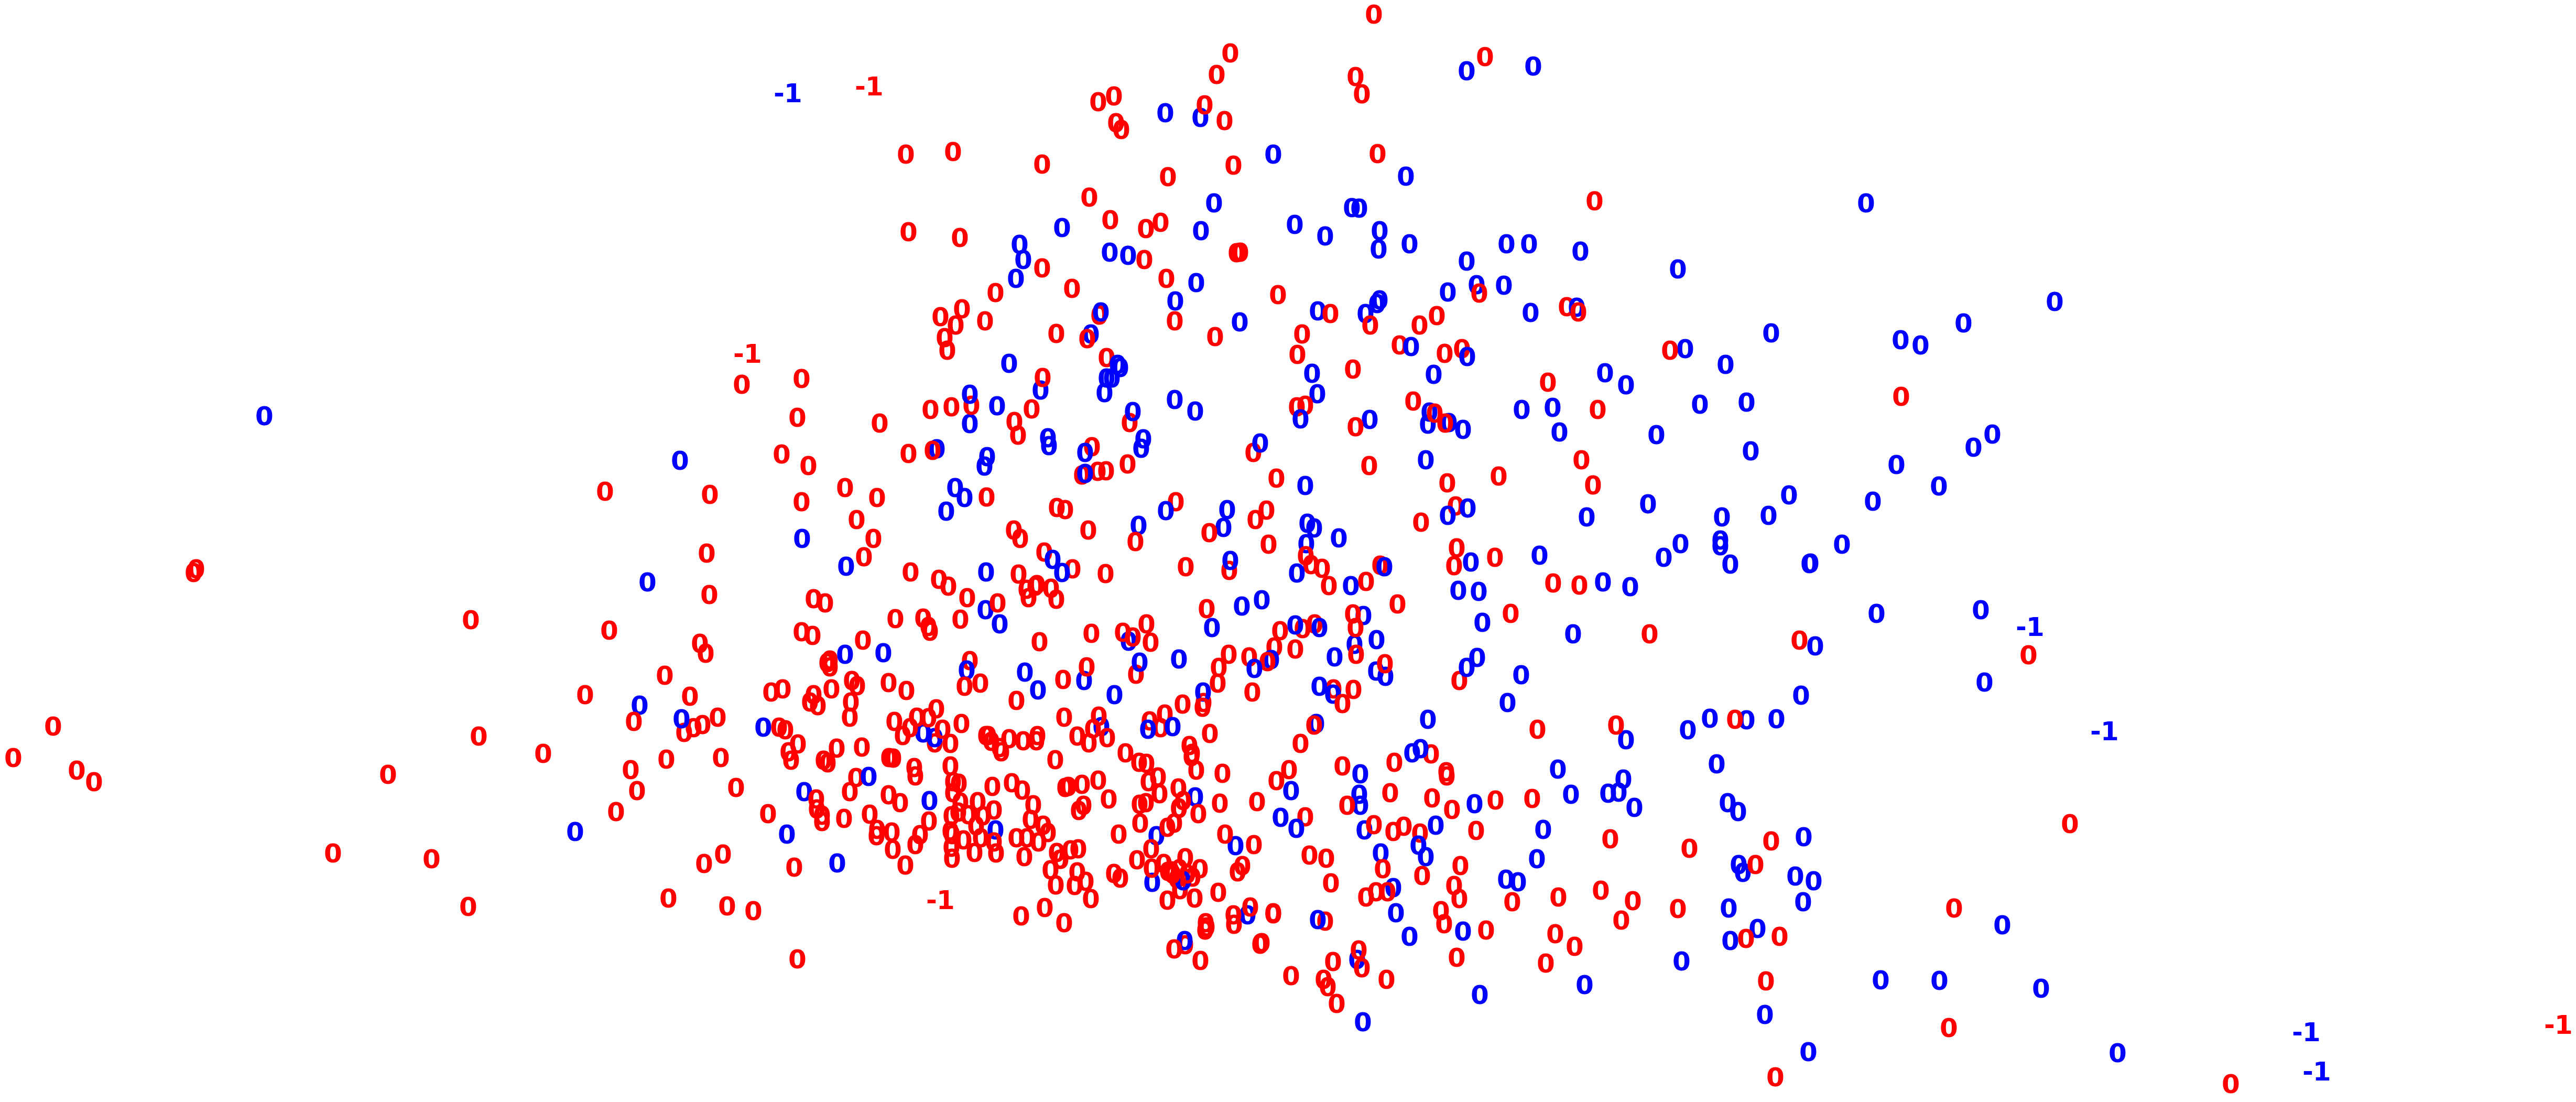

In [6]:
dbscan_cluster = DBSCAN(eps=3, min_samples=3)
clusters = dbscan_cluster.fit_predict(x_std)

pca = PCA(n_components=2).fit_transform(x_std)

plt.figure(figsize=(8,6))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

In [7]:
df_minsamples = pd.DataFrame(columns=("Min. Samples", "Clusters"))
for i in range(1,6):
    dbscan_cluster = DBSCAN(eps = 1, min_samples = i, metric ="euclidean")
    clusters = dbscan_cluster.fit_predict(x_std)
    cluster_count = len(np.unique(clusters))
    df_minsamples = df_minsamples.append({"Min. Samples":i, 
                                          "Clusters":cluster_count}, 
                                         ignore_index=True)
df_minsamples

,Min. Samples,Clusters
0,1,396
1,2,48
2,3,14
3,4,9
4,5,5


## eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

In [8]:
df_minsamples = pd.DataFrame(columns=("Min. Samples", "Clusters"))
for i in range(1,6):
    dbscan_cluster = DBSCAN(eps = i, min_samples = 1, metric ="euclidean")
    clusters = dbscan_cluster.fit_predict(x_std)
    cluster_count = len(np.unique(clusters))
    df_minsamples = df_minsamples.append({"Min. Samples":i, 
                                          "Clusters":cluster_count}, 
                                         ignore_index=True)
df_minsamples

,Min. Samples,Clusters
0,1,396
1,2,31
2,3,8
3,4,1
4,5,1


Epsilon değeri yükseldikçe, veri grupları kalabalıklaşarak küme sayısı düşmektedir. Modelimiz, yarıçapı büyüttükçe, tüm verileri tek bir kümeye dahil edecektir.
Ayrıca min_samples değeri arttıkça, benzer şekilde modelimiz hemen hiçbir veriyi bir araya toplayamamakta, bir çoğunu aykırı değer olarak işaretlemektedir. Bunun ana nedenlerinden biri de verilerimizin çok dağınık olmasıdır.
Yine bu yüzden, verilerimizi 2 farklı kümeye ayırmamız oldukça zordur.